In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

## Reading the data

In [7]:
#Reading the training data
train_df = pd.read_csv('cleaned_train_df.csv')

#Reading the testing data
test_df = pd.read_csv('test.csv')


In [8]:
#Let's see the head of the training data
train_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [9]:
#Let's see the head of the testing data
test_df.head()
#We can notice that the price is not there as it is our job to predict it

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [10]:
#Let's see the shape of the train data
print('Train Data shape: ', train_df.shape)

#Let's see the shape of the test data
print('Test Data shape: ', test_df.shape)

Train Data shape:  (40923, 10)
Test Data shape:  (10788, 10)


In [11]:
#Let's see the info of the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40923 entries, 0 to 40922
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40923 non-null  float64
 1   cut      40923 non-null  object 
 2   color    40923 non-null  object 
 3   clarity  40923 non-null  object 
 4   depth    40923 non-null  float64
 5   table    40923 non-null  float64
 6   price    40923 non-null  int64  
 7   x        40923 non-null  float64
 8   y        40923 non-null  float64
 9   z        40923 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [12]:
#Let's see the describtion of the train data
train_df.describe()

,carat,depth,table,price,x,y,z
count,40923.000000,40923.000000,40923.000000,40923.000000,40923.000000,40923.000000,40923.000000
mean,0.753699,61.675539,57.395858,3610.107934,5.649772,5.653485,3.484696
std,0.414574,1.267839,2.121238,3555.402645,1.048616,1.042296,0.642392
min,0.200000,55.200000,51.000000,326.000000,3.730000,3.680000,2.060000
25%,0.390000,61.000000,56.000000,921.000000,4.680000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,2287.000000,5.650000,5.660000,3.490000
75%,1.020000,62.500000,59.000000,5028.000000,6.490000,6.490000,4.010000
max,2.220000,64.900000,64.000000,18806.000000,8.800000,8.690000,4.990000


### Checking for null data

In [13]:
#Let's see if we have null data
train_df.isna().sum()
#As we can see, we do not have null data in our dataset

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
#Let's see the columns in the train data
train_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## carat

**Carat refers to the weight of the diamond, which is an important factor in determining its price.**

In [15]:
# Let's see the describtion 
carat_stats = train_df['carat'].describe()
print("Carat Statistics:")
print(carat_stats)

Carat Statistics:
count    40923.000000
mean         0.753699
std          0.414574
min          0.200000
25%          0.390000
50%          0.700000
75%          1.020000
max          2.220000
Name: carat, dtype: float64


In [16]:
carat_counts = train_df['carat'].value_counts().sum()
carat_counts

40923

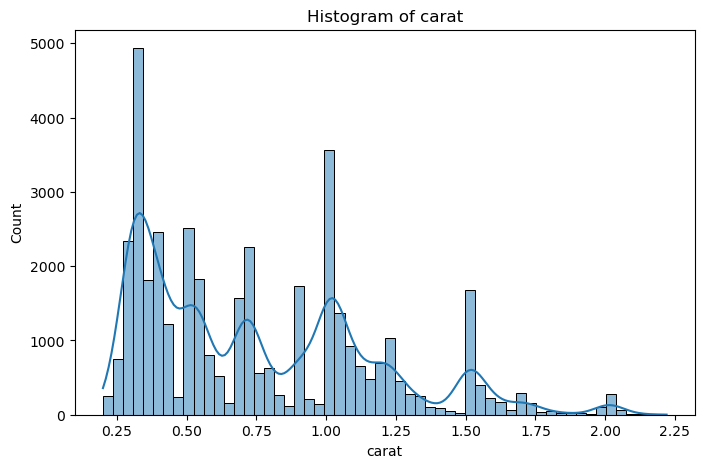

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='carat', kde=True)
plt.title(f"Histogram of {'carat'}")
plt.show()

## cut

**Cut refers to the quality of how the diamond is cut, affecting its brilliance and overall appearance.**

In [18]:
# Let's see the describtion 
cut_stats = train_df['cut'].describe()
print("Cut Statistics:")
print(cut_stats)

Cut Statistics:
count     40923
unique        5
top       Ideal
freq      16805
Name: cut, dtype: object


In [19]:
#Let's see the value counts of cut
cut_counts = train_df['cut'].value_counts()
print("\nCut Counts:")
print(cut_counts)


Cut Counts:
cut
Ideal        16805
Premium      10647
Very Good     9403
Good          3623
Fair           445
Name: count, dtype: int64


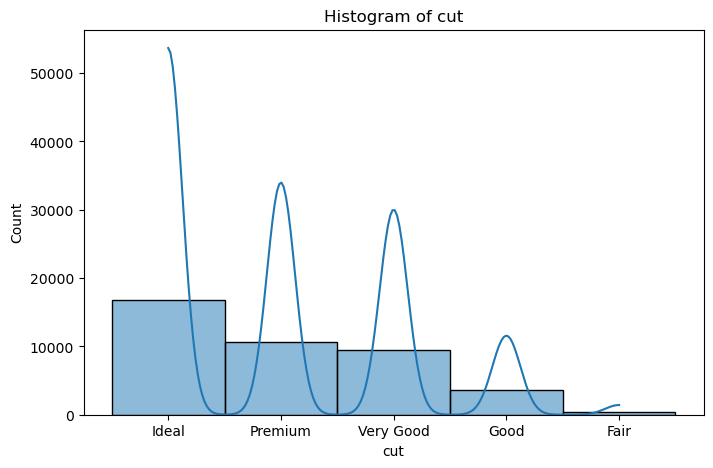

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='cut', kde=True)
plt.title(f"Histogram of {'cut'}")
plt.show()

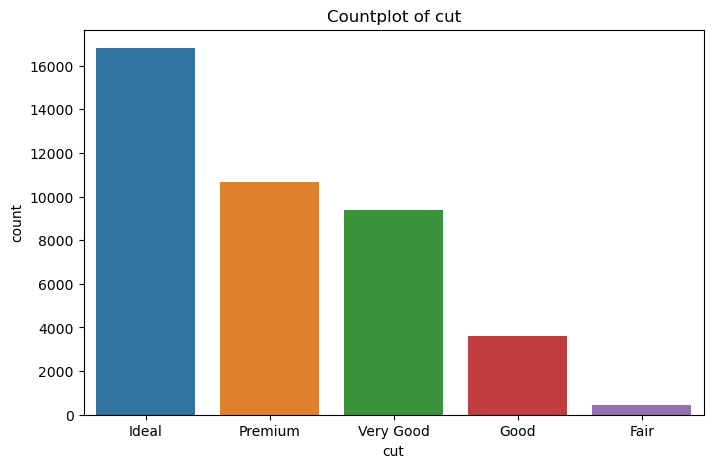

In [21]:

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='cut')
plt.title(f"Countplot of {'cut'}")
plt.show()

## color

**Color represents the diamond's color grade, ranging from D (colorless) to Z (light yellow or brown).**

In [22]:
# Let's see the describtion 
color_stats = train_df['color'].describe()
print("Color Statistics:")
print(color_stats)

Color Statistics:
count     40923
unique        7
top           G
freq       8724
Name: color, dtype: object


In [23]:
color_counts = train_df['color'].value_counts()
print("\nColor Counts:")
print(color_counts)


Color Counts:
color
G    8724
E    7625
F    7358
H    6154
D    5282
I    3807
J    1973
Name: count, dtype: int64


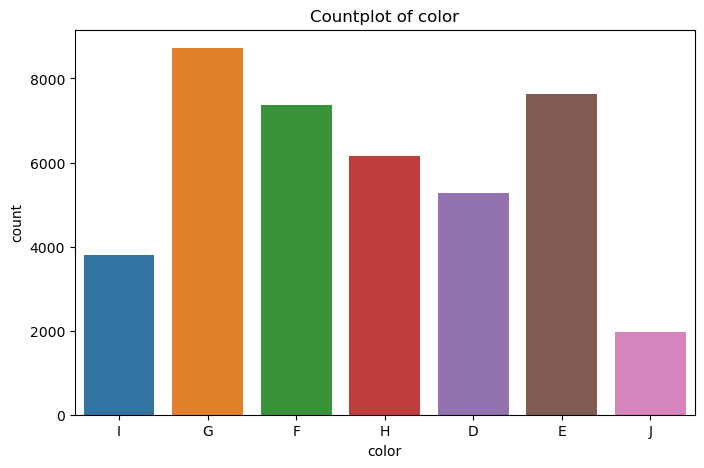

In [24]:
#Let's see the colors 
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='color')
plt.title(f"Countplot of {'color'}")
plt.show()


## clarity

**Clarity refers to the presence of internal or external flaws in the diamond. It is usually graded on a scale from IF (internally flawless) to I3 (included).**

In [25]:
# Let's see the describtion 
clarity_stats = train_df['clarity'].describe()
print("Clarity Statistics:")
print(clarity_stats)

Clarity Statistics:
count     40923
unique        8
top         SI1
freq       9883
Name: clarity, dtype: object


In [26]:
clarity_counts = train_df['clarity'].value_counts()
print("\nClarity Counts:")
print(clarity_counts)


Clarity Counts:
clarity
SI1     9883
VS2     9506
SI2     6497
VS1     6309
VVS2    3983
VVS1    2880
IF      1433
I1       432
Name: count, dtype: int64


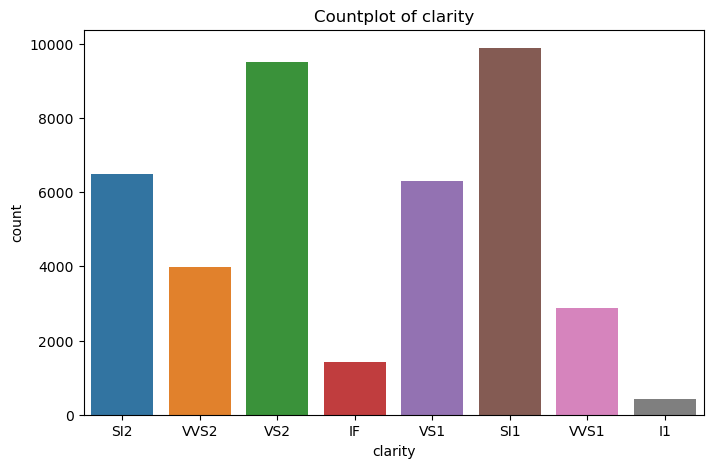

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='clarity')
plt.title(f"Countplot of {'clarity'}")
plt.show()

## depth

**Depth represents the height of a diamond as a percentage of its diameter.**

In [28]:
# Let's see the describtion 
depth_stats = train_df['depth'].describe()
print("depth Statistics:")
print(depth_stats)

depth Statistics:
count    40923.000000
mean        61.675539
std          1.267839
min         55.200000
25%         61.000000
50%         61.800000
75%         62.500000
max         64.900000
Name: depth, dtype: float64


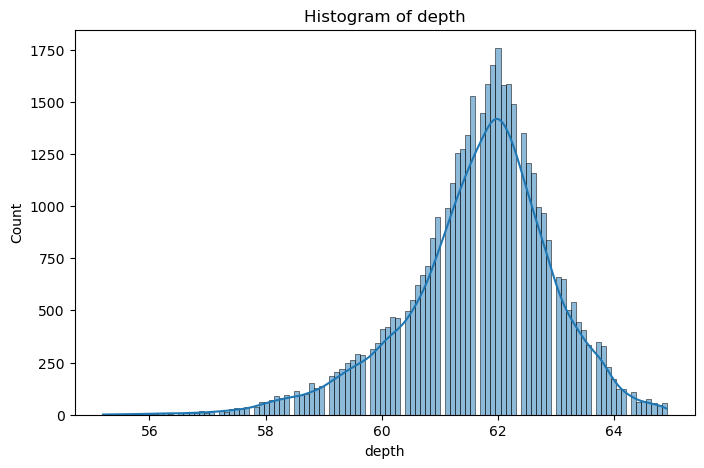

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='depth', kde=True)
plt.title(f"Histogram of {'depth'}")
plt.show()

## table

**Table refers to the width of the diamond's top facet as a percentage of its diameter.**

In [30]:
# Let's see the describtion 
table_stats = train_df['table'].describe()
print("Table Statistics:")
print(table_stats)

Table Statistics:
count    40923.000000
mean        57.395858
std          2.121238
min         51.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         64.000000
Name: table, dtype: float64


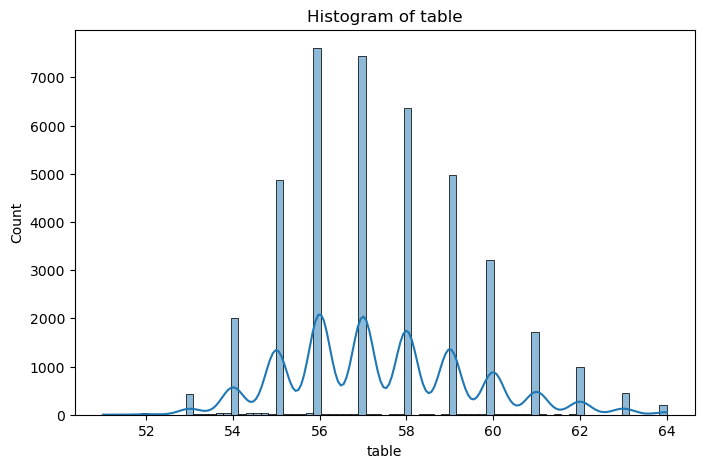

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='table', kde=True)
plt.title(f"Histogram of {'table'}")
plt.show()

## price

**This column contains the target variable, i.e., the price of the diamond.**

In [32]:
# Let's see the describtion 
price_stats = train_df['price'].describe()
print("Price Statistics:")
print(price_stats)

Price Statistics:
count    40923.000000
mean      3610.107934
std       3555.402645
min        326.000000
25%        921.000000
50%       2287.000000
75%       5028.000000
max      18806.000000
Name: price, dtype: float64


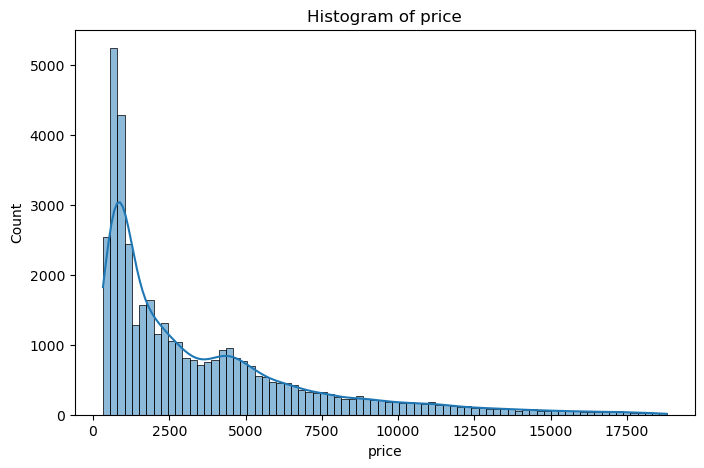

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='price', kde=True)
plt.title(f"Histogram of {'price'}")
plt.show()

## x

**This column represent the dimensions of the diamond in length.**

In [34]:
# Let's see the describtion 
x_stats = train_df['x'].describe()
print("X Statistics:")
print(x_stats)
#we can notice that the min is 0

X Statistics:
count    40923.000000
mean         5.649772
std          1.048616
min          3.730000
25%          4.680000
50%          5.650000
75%          6.490000
max          8.800000
Name: x, dtype: float64


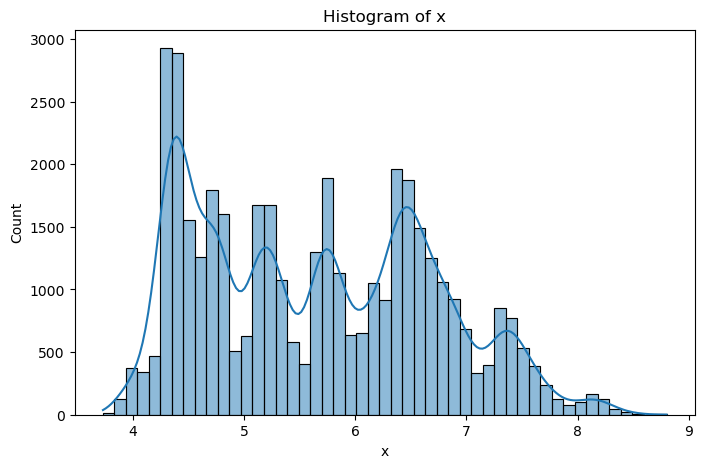

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='x', kde=True)
plt.title(f"Histogram of {'x'}")
plt.show()

## y

**This column represent the dimensions of the diamond in width.**

In [36]:
# Let's see the describtion 
y_stats = train_df['y'].describe()
print("Y Statistics:")
print(y_stats)
#we can notice that the min is 0

Y Statistics:
count    40923.000000
mean         5.653485
std          1.042296
min          3.680000
25%          4.700000
50%          5.660000
75%          6.490000
max          8.690000
Name: y, dtype: float64


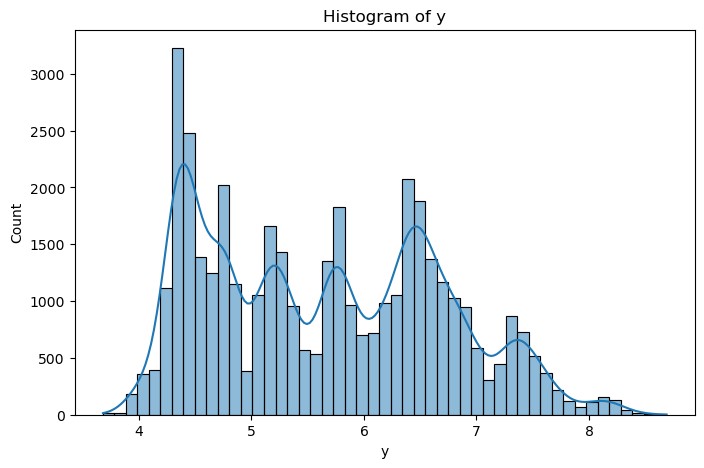

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

## z

**This column represent the dimensions of the diamond in depth.** 

In [38]:
# Let's see the describtion 
z_stats = train_df['z'].describe()
print("z Statistics:")
print(z_stats)
#we can notice that the min is 0

z Statistics:
count    40923.000000
mean         3.484696
std          0.642392
min          2.060000
25%          2.890000
50%          3.490000
75%          4.010000
max          4.990000
Name: z, dtype: float64


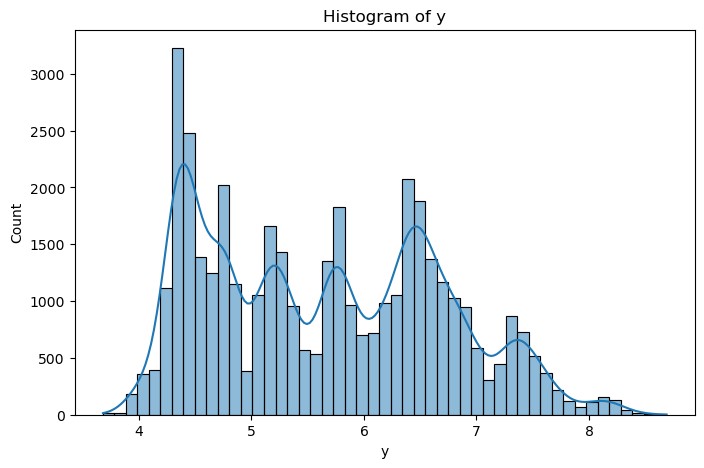

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

## Visualization

<Axes: >

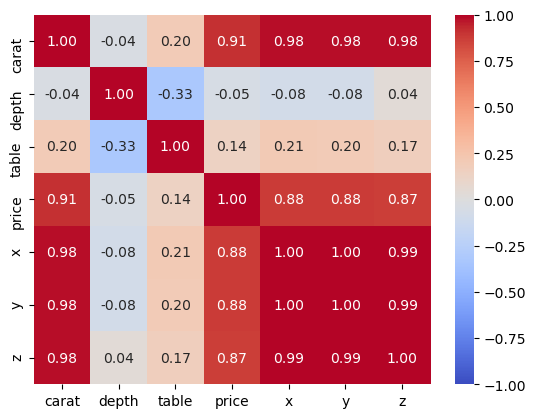

In [40]:
# plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f")

C:\Users\habob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


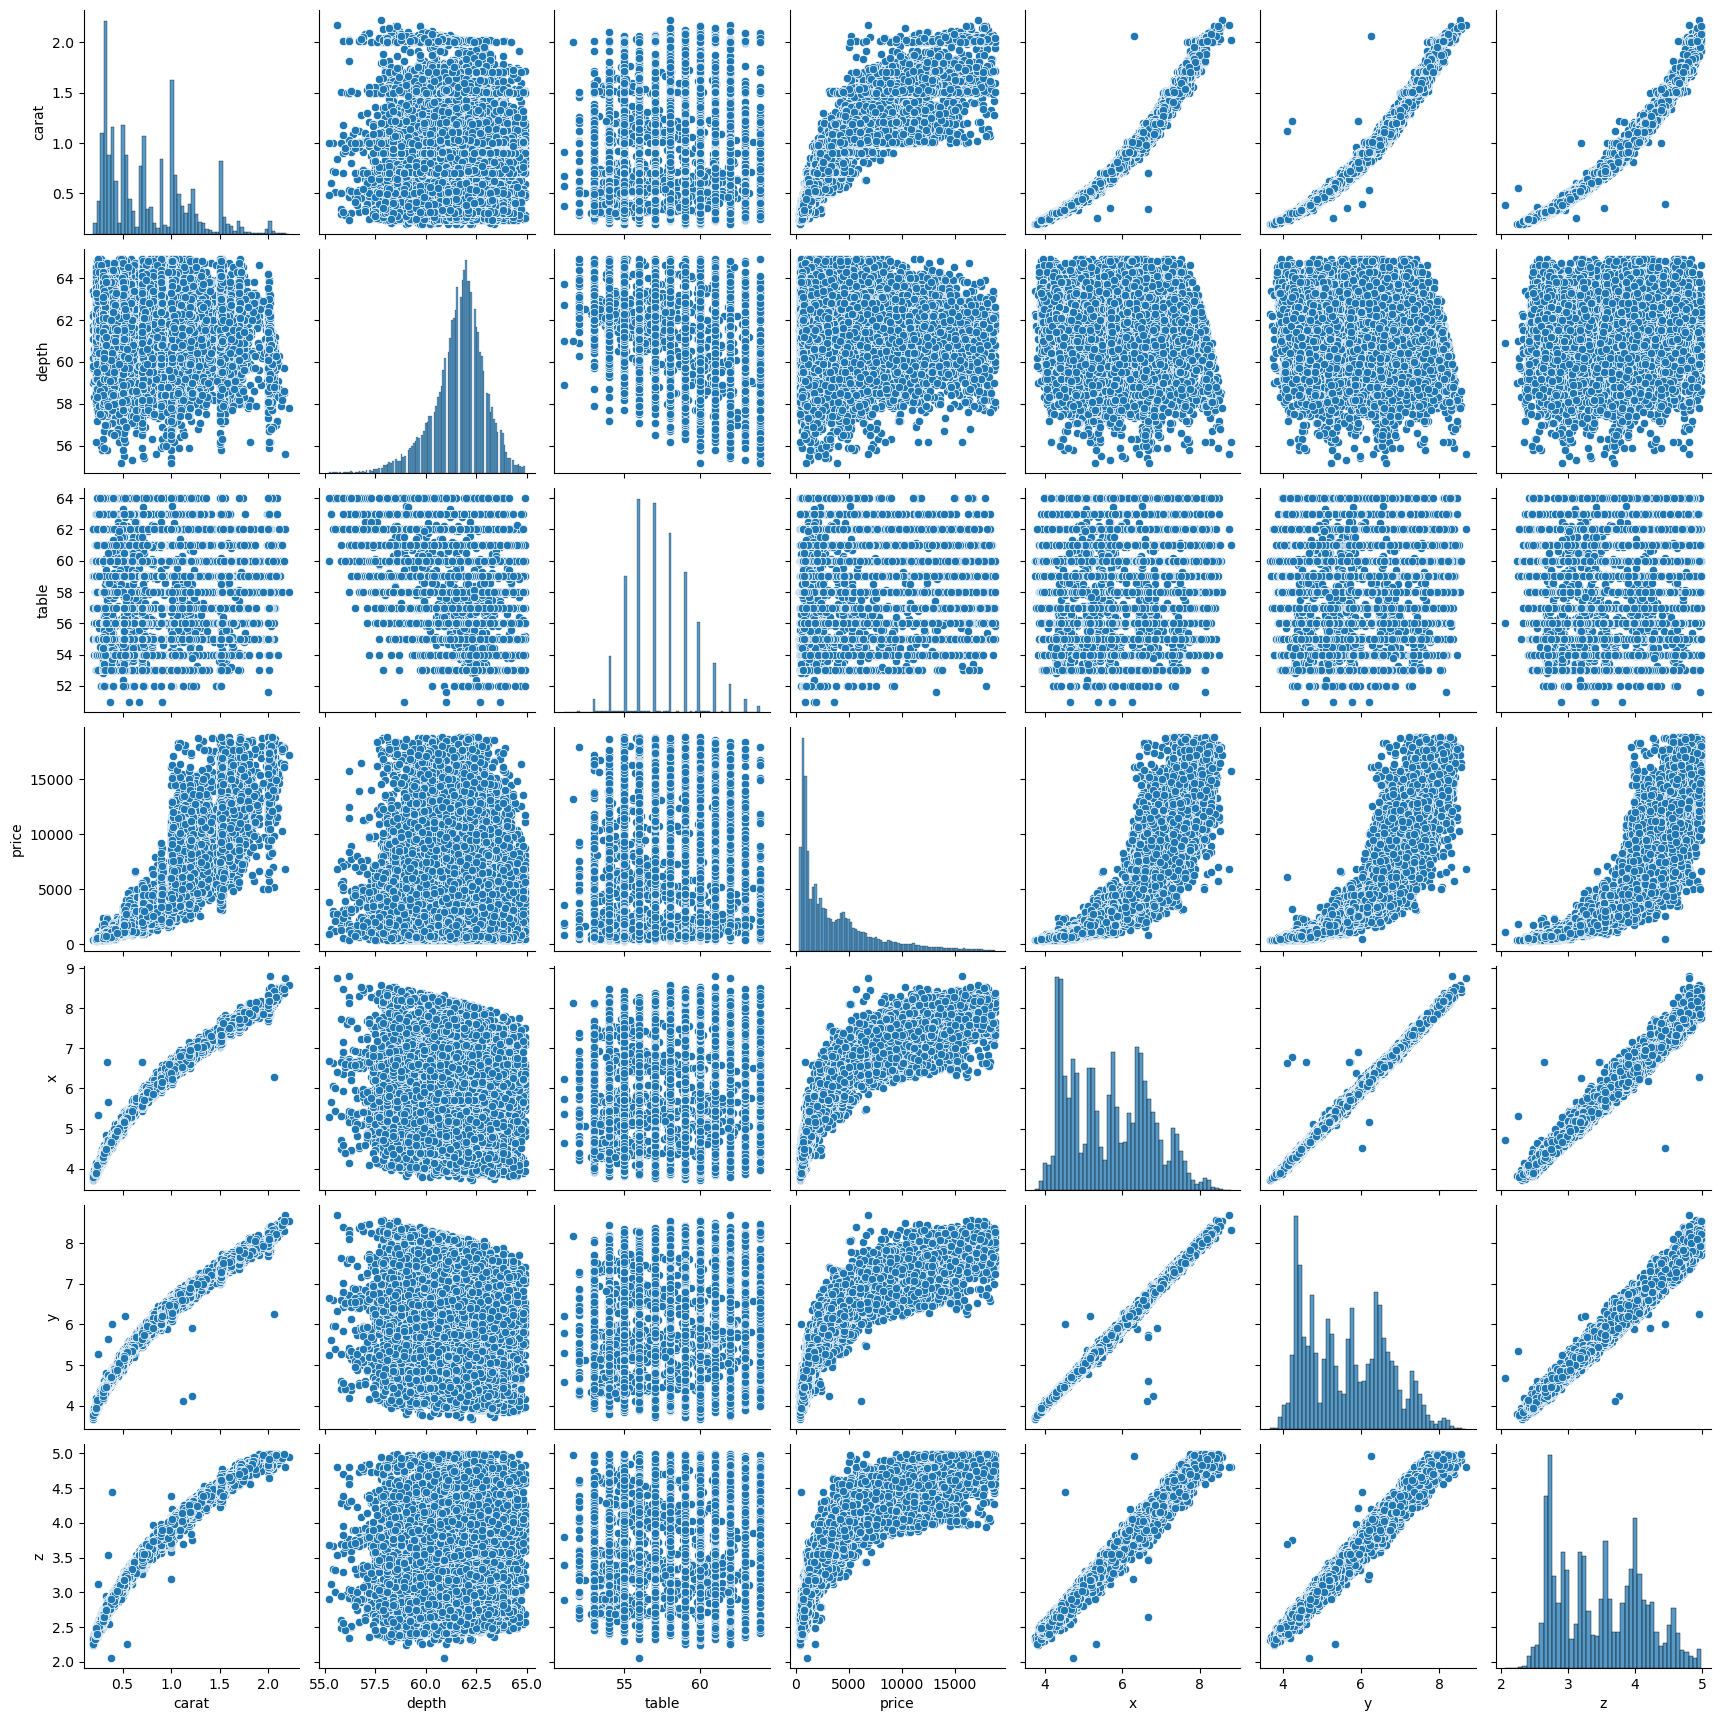

In [41]:
sns.pairplot(train_df)

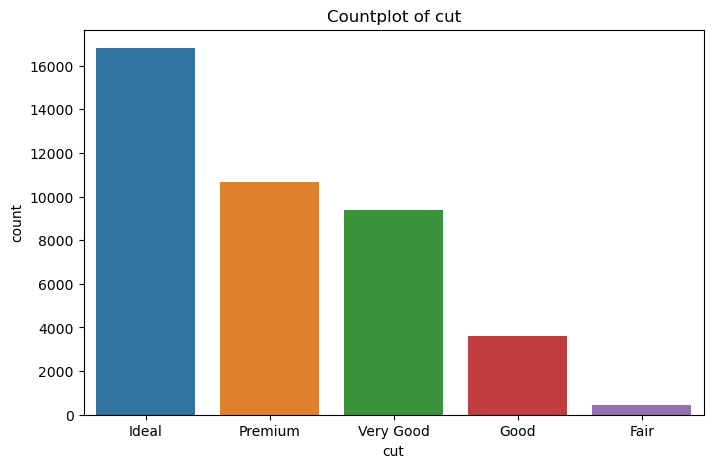

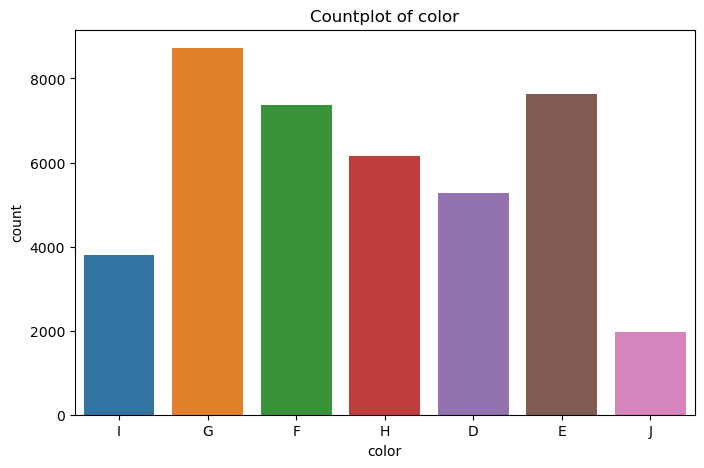

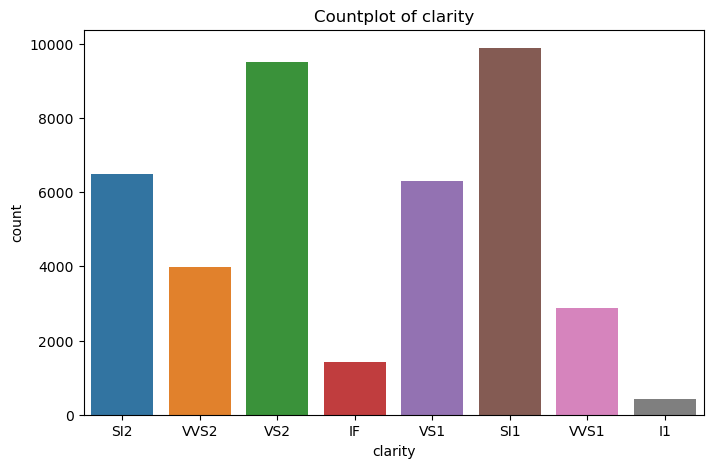

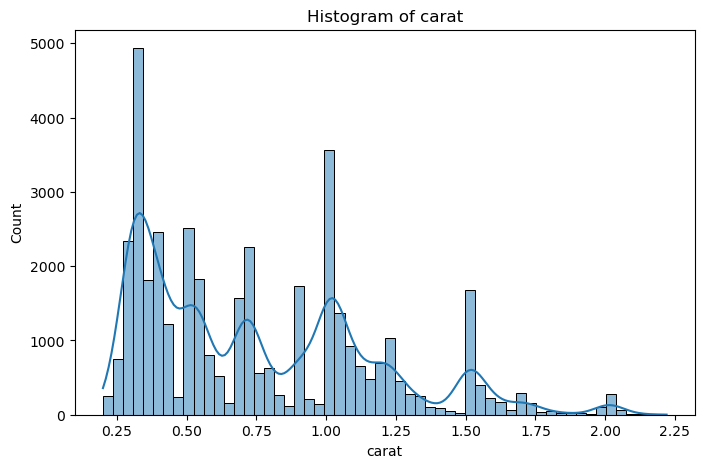

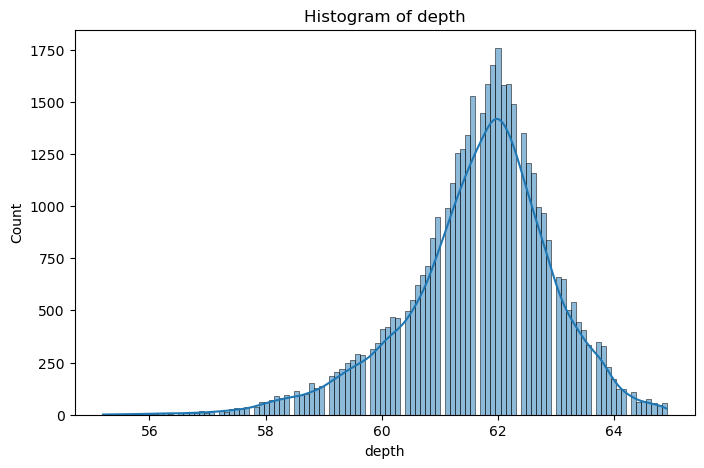

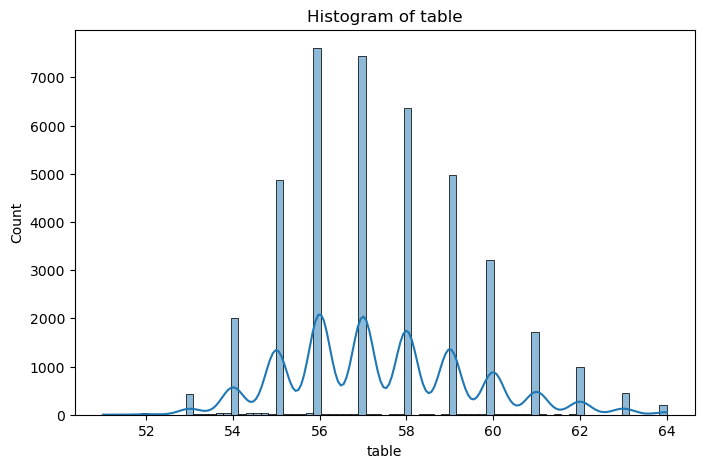

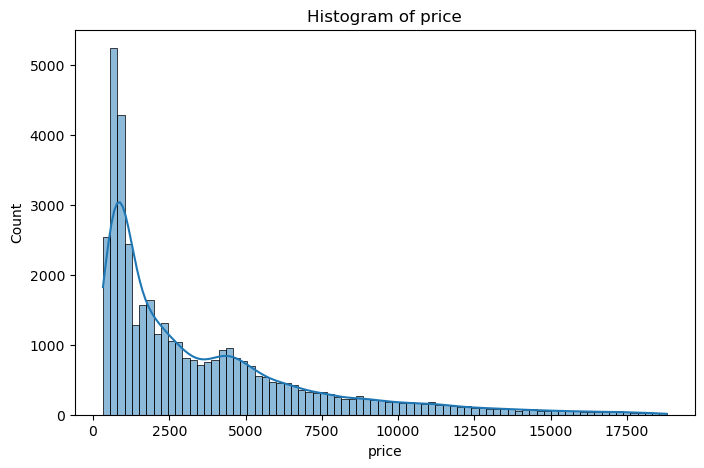

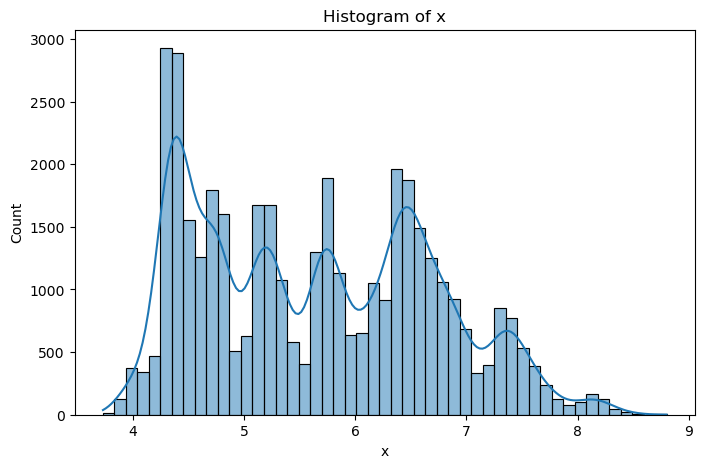

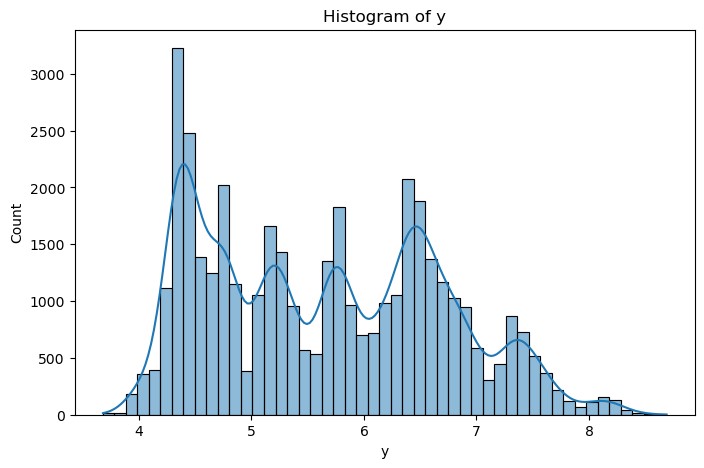

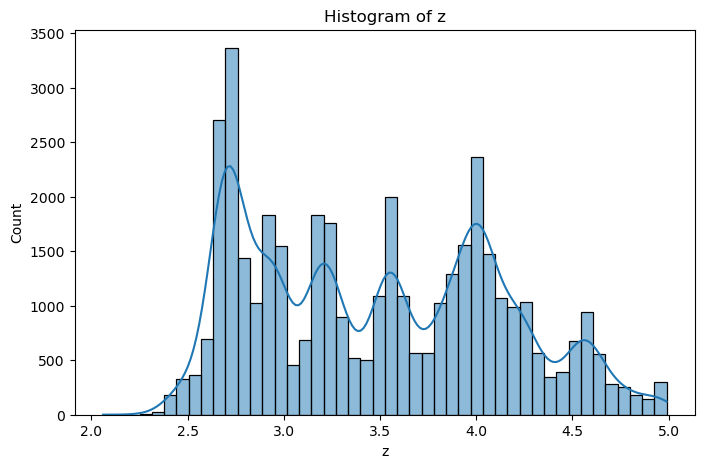

In [42]:
# Select columns for visualization
columns_to_visualize = ['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Plot categorical columns
for column in ['cut', 'color', 'clarity']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=column)
    plt.title(f"Countplot of {column}")
    plt.show()

# Plot numerical columns
for column in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

**As we can notice from the box plots, the outliers are deleted.**

## Categorical columns

In [43]:
# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)
#As we can see we have three categorical columns

Categorical Columns:
Index(['cut', 'color', 'clarity'], dtype='object')


In [44]:
train_df['clarity'].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

## Dealing with Categorical columns

**Listed below are the diamond color grades (from 'D' to 'J') in descending order of importance, with 'D' being the most important and 'J' being the least important:**

-D: Colorless
-E: Colorless
-F: Colorless
-G: Near Colorless
-H: Near Colorless
-I: Near Colorless
-J: Near Colorless

In [45]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = ['color','cut', 'clarity']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']



In [46]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OrdinalEncoder(categories= [color,cut,clarity]),cat),remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [47]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['D', 'E', 'F', 'G',
                                                             'H', 'I', 'J'],
                                                            ['Ideal', 'Premium',
                                                             'Very Good',
                                                             'Good', 'Fair'],
                                                            ['IF', 'VVS1',
                                                             'VVS2', 'VS1',
                                                             'VS2', 'SI1',
                                                             'SI2', 'I1']]),
                                 ['color', 'cut', 'clarity'])],
                  verbose_feature_names_out=False)

### Scaler

In [48]:
scaler = MinMaxScaler()

## Splitting the data to X and y

In [49]:
X = train_df.drop(columns=["price"])
y = train_df.price

In [50]:
#Let's see X
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50


In [51]:
#Let's see the shape of X
X.shape

(40923, 9)

In [52]:
#Let's see y
y.head()

0     4270
1    15164
2      828
3     1577
4     2596
Name: price, dtype: int64

In [53]:
#Let's see the shape of y
y.shape

(40923,)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [55]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (32738, 9)
Train target shape   :  (32738,)
Test features shape  :  (8185, 9)
Test target shape    :  (8185,)


In [56]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

## LinearRegression Model

In [57]:
from sklearn.pipeline import Pipeline

operations = [
    ("ordinal", column_trans),
    ('scaler', scaler),
    ("linear",LinearRegression())
]

pipe_linear_model = Pipeline(steps=operations)

pipe_linear_model.fit(X_train, y_train)

Pipeline(steps=[('ordinal',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'cut', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('linear', LinearRegression())])

In [58]:
pred = pipe_linear_model.predict(X_test)

In [59]:
train_val(pipe_linear_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.121409e-01,9.065651e-01
mae,7.201043e+02,7.191321e+02
mse,1.115170e+06,1.161465e+06
rmse,1.056016e+03,1.077713e+03


### Cross validation

In [60]:
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

pd.DataFrame(scores)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              9.119892e-01
train_r2                             9.121473e-01
test_neg_mean_absolute_error        -7.204780e+02
train_neg_mean_absolute_error       -7.200868e+02
test_neg_mean_squared_error         -1.116803e+06
train_neg_mean_squared_error        -1.115085e+06
test_neg_root_mean_squared_error    -1.056291e+03
train_neg_root_mean_squared_error   -1.055970e+03
dtype: float64

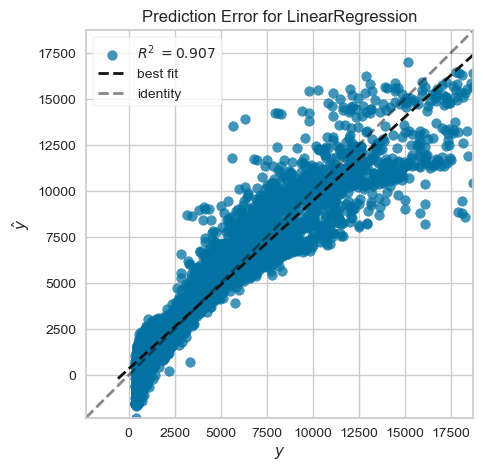

In [61]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
pipe_linear_model = Pipeline(steps=operations)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

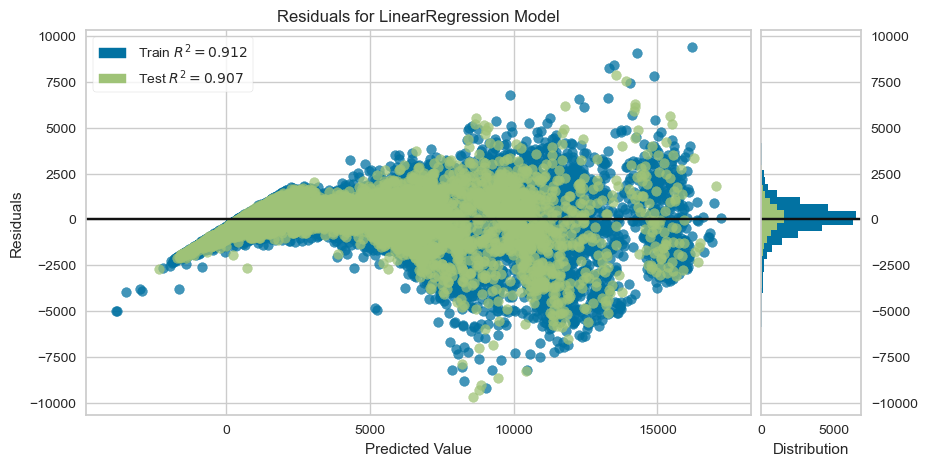

In [62]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = Pipeline(steps=operations)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

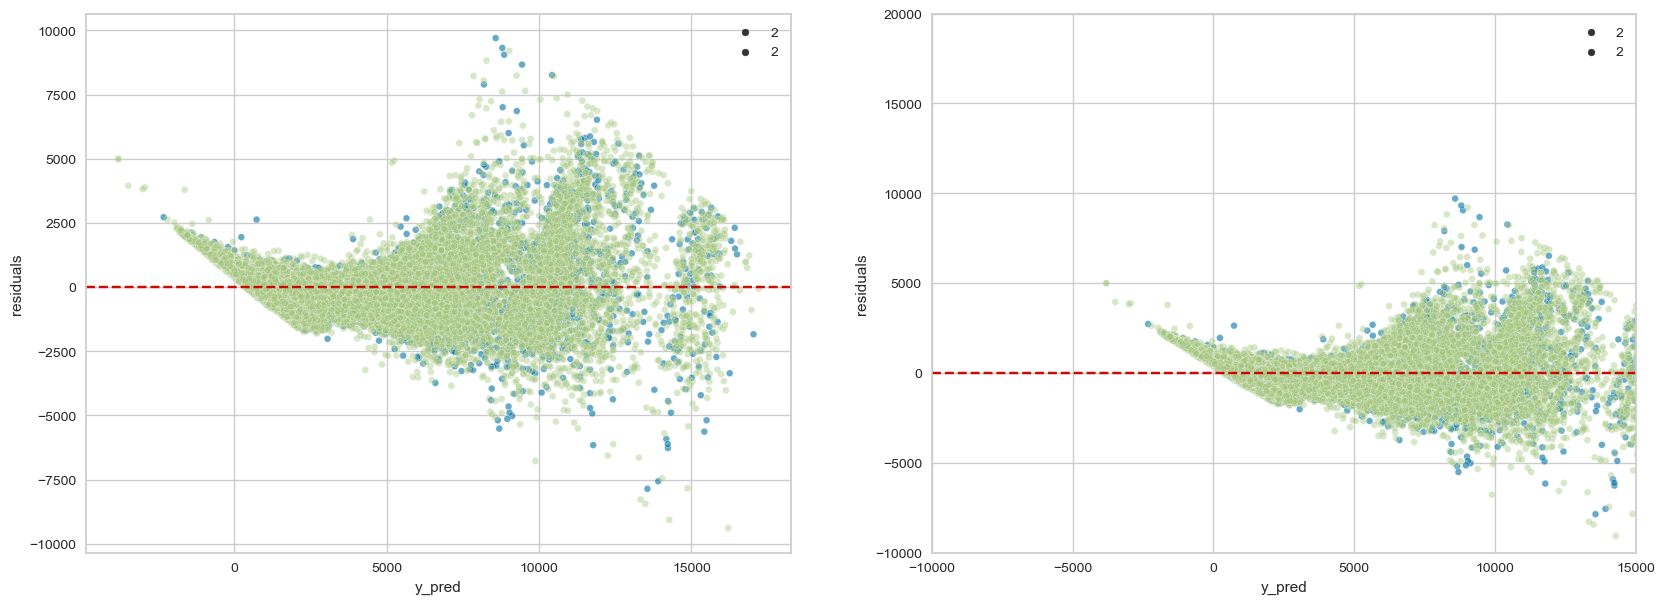

In [63]:
y_pred=pipe_linear_model.predict(X_test)
y_pred_train = pipe_linear_model.predict(X_train)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


### Saving the scores of lr

In [64]:
lr_y_pred = pipe_linear_model.predict(X_test)
lr_R2 = r2_score(y_test, lr_y_pred),
lr_mae = mean_absolute_error(y_test, lr_y_pred),
lr_mse = mean_squared_error(y_test, lr_y_pred),
lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)

## Random Forest Model

In [65]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("rf",RandomForestRegressor(random_state=101))
]

pipe_rf_model = Pipeline(steps=operations)

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('Ordinalencoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'cut', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('rf', RandomForestRegressor(random_state=101))])

In [66]:
pred = pipe_rf_model.predict(X_test)

In [67]:
train_val(pipe_rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.997500,0.982484
mae,89.391243,234.418625
mse,31730.262968,217742.878636
rmse,178.129905,466.629273


In [68]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("rf",RandomForestRegressor(random_state=101))
]
rf_model = Pipeline(steps=operations)
scores = cross_validate(rf_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

pd.DataFrame(scores)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.982149
train_r2                                  0.997495
test_neg_mean_absolute_error           -242.021013
train_neg_mean_absolute_error           -90.017104
test_neg_mean_squared_error         -226373.029751
train_neg_mean_squared_error         -31794.788546
test_neg_root_mean_squared_error       -475.269199
train_neg_root_mean_squared_error      -178.308366
dtype: float64

## RF GridSearch

In [69]:
#Creating the grid search for Random forest model
from sklearn.model_selection import train_test_split, GridSearchCV
operations = [
    ("Ordinalencoder", column_trans),
    ("rf",RandomForestRegressor(random_state=101))
]


pipeline = Pipeline(steps=operations)


# Define the parameter grid for grid search
param_grid = {
    "rf__n_estimators": [300,400, 500, 600],
    "rf__max_depth": [4, 5, 6, 8],
    'rf__max_features':[4, 5, 6, 8],
}

# param_grid = {'rf__n_estimators':[100,200, 300, 400, 500, 600],
#              'rf__max_features':[2, 4, 6, 8],
#              'rf__max_depth':[2, 4,6, 8],
# #              'rf__min_samples_split':[2, 3, 4, 5],
# #              'rf__min_samples_leaf': [2, 3, 4, 5]
#              }

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Ordinalencoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['D',
                                                                                                     'E',
                                                                                                     'F',
                                                                                                     'G',
                                                                                                     'H',
                                                                                                     'I',
                                                                                                     'J'],
                                                                                                    ['Ideal',
                                                                                                     'Premium',
                                                                                                     'Very '
                                                                                                     'Good',
                                                                                                     'Good',
                                                                                                     'Fair'],
                                                                                                    ['IF',
                                                                                                     'VVS1',
                                                                                                     'VVS2',
                                                                                                     'VS1',
                                                                                                     'VS2',
                                                                                                     'SI1',
                                                                                                     'SI2',
                                                                                                     'I1']]),
                                                                         ['color',
                                                                          'cut',
                                                                          'clarity'])],
                                                          verbose_feature_names_out=False)),
                                       ('rf',
                                        RandomForestRegressor(random_state=101))]),
             param_grid={'rf__max_depth': [4, 5, 6, 8],
                         'rf__max_features': [4, 5, 6, 8],
                         'rf__n_estimators': [300, 400, 500, 600]},
             scoring='neg_root_mean_squared_error')

In [70]:
pred = grid_search.predict(X_test)

In [71]:
train_val(grid_search, X_train, y_train, X_test, y_test)

,train,test
R2,0.980301,0.976640
mae,283.539410,296.688996
mse,250036.028028,290380.983215
rmse,500.036027,538.870099


In [72]:
# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the testing data
test_score = best_model.score(X_test, y_test)

# Print the best score and the test score
print("Best Score:", best_score)
print("Test Score:", test_score)

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

Best Score: -535.9026499480146
Test Score: 0.9766400886899773
Best Parameters:
{'rf__max_depth': 8, 'rf__max_features': 8, 'rf__n_estimators': 400}


### Creating the model with the best params

In [73]:
operations = [
    ("Ordinalencoder", column_trans),
    ("rf",RandomForestRegressor(n_estimators=400, max_features=8, max_depth=8,  random_state=101))
]

pipe_rf_model2 = Pipeline(steps=operations)

pipe_rf_model2.fit(X_train, y_train)

pred2 = pipe_rf_model.predict(X_test)


train_val(pipe_rf_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.980301,0.976640
mae,283.539410,296.688996
mse,250036.028028,290380.983215
rmse,500.036027,538.870099


### Saving the scores of rf

In [74]:
y_pred = pipe_rf_model2.predict(X_test)
rf_R2 = r2_score(y_test, y_pred),
rf_mae = mean_absolute_error(y_test, y_pred),
rf_mse = mean_squared_error(y_test, y_pred),
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

## Feature Importance of RF Model 

In [75]:
fe = train_df.copy()
fe = fe.drop('price', axis=1)
fe.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50


In [76]:
features = fe.columns
features

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [77]:
X_train_rf = column_trans.fit_transform(X_train)
X_train_rf

,color,cut,clarity,carat,depth,table,x,y,z
11988,2.0,2.0,3.0,1.52,63.4,60.0,7.30,7.25,4.61
32444,5.0,0.0,3.0,0.72,61.7,54.5,5.77,5.80,3.57
25376,4.0,0.0,3.0,0.30,61.6,55.0,4.27,4.30,2.64
25659,1.0,1.0,2.0,0.32,59.9,58.0,4.45,4.50,2.68
13875,3.0,0.0,4.0,0.30,62.0,54.0,4.33,4.35,2.69
...,...,...,...,...,...,...,...,...,...
12363,4.0,2.0,4.0,1.21,62.9,57.0,6.75,6.80,4.26
5695,3.0,1.0,5.0,1.09,60.2,60.0,6.70,6.66,4.02
8006,1.0,1.0,4.0,0.20,59.0,60.0,3.81,3.78,2.24
17745,0.0,0.0,6.0,0.90,60.8,56.0,6.26,6.24,3.80


In [78]:
rf_model = RandomForestRegressor(max_depth=8, max_features=8, n_estimators=400, random_state=101).fit(X_train_rf, y_train)
rf_feature_imp = pd.DataFrame(data=rf_model.feature_importances_,
                              index = features,
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
clarity,0.656373
y,0.224785
color,0.076971
carat,0.034826
x,0.003909
z,0.002475
depth,0.000251
cut,0.000242
table,0.000169


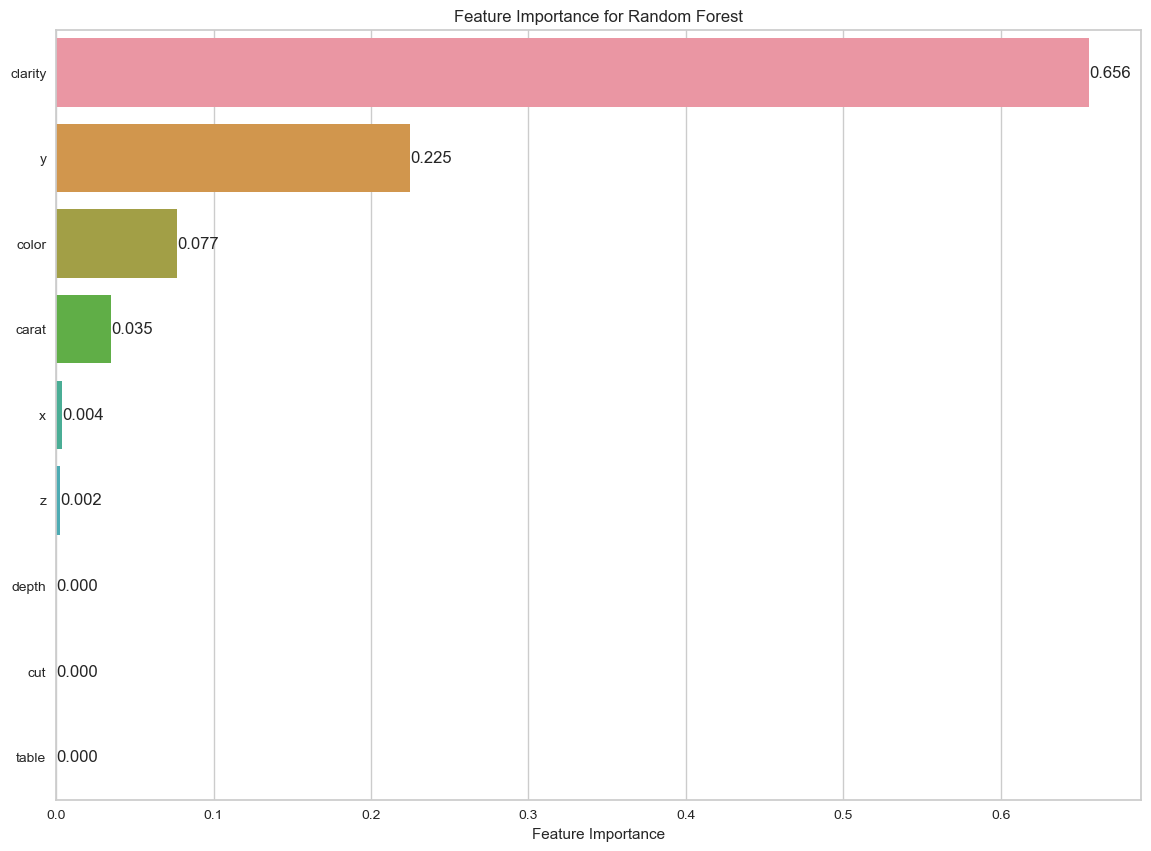

In [79]:
#Plotting the feature importance
plt.figure(figsize=(14, 10), dpi=100)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [80]:
'z', 'depth', 'table', 'cut', 'x'

('z', 'depth', 'table', 'cut', 'x')

## XG Model

In [81]:
import xgboost as xgb


operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("XGB_model", xgb.XGBRegressor(random_state=101))
]

pipe_xg_model = Pipeline(steps=operations)

pipe_xg_model.fit(X_train, y_train)

Pipeline(steps=[('Ordinalencoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'cut', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [82]:
pred = pipe_xg_model.predict(X_test)

In [83]:
train_val(pipe_xg_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991929,0.981691
mae,188.546584,241.443208
mse,102443.223019,227590.155548
rmse,320.067529,477.064100


### XG Cross validation

In [84]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("XGB_model", xgb.XGBRegressor(random_state=101))
]

xg_model = Pipeline(steps=operations)
scores = cross_validate(xg_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

pd.DataFrame(scores)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.983132
train_r2                                  0.992487
test_neg_mean_absolute_error           -242.659799
train_neg_mean_absolute_error          -183.208051
test_neg_mean_squared_error         -213788.206478
train_neg_mean_squared_error         -95361.836867
test_neg_root_mean_squared_error       -461.943051
train_neg_root_mean_squared_error      -308.795331
dtype: float64

### XG GridSearch 

In [85]:
#Creating the grid search of XG model
from sklearn.model_selection import train_test_split, GridSearchCV
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("xg", xgb.XGBRegressor(random_state=101))
]


pipeline = Pipeline(steps=operations)


# Define the parameter grid for grid search
param_grid = {
    "xg__n_estimators": [300,400, 500, 600],
    "xg__max_depth": [4, 6, 8],
    "xg__min_child_weight": [3, 5, 7, 9]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Ordinalencoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['D',
                                                                                                     'E',
                                                                                                     'F',
                                                                                                     'G',
                                                                                                     'H',
                                                                                                     'I',
                                                                                                     'J'],
                                                                                                    ['Ideal',
                                                                                                     'Premium',
                                                                                                     'Very '
                                                                                                     'Good',
                                                                                                     'Good',
                                                                                                     'Fair'],
                                                                                                    ['IF',
                                                                                                     'VVS1',
                                                                                                     'VVS2',
                                                                                                     'VS1',
                                                                                                     'VS2',
                                                                                                     'SI1',
                                                                                                     'SI2',
                                                                                                     'I1']]),
                                                                         ['color',
                                                                          'cut',
                                                                          'clarity'])],
                                                          verbose_feature_names_out=Fals...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=101, ...))]),
             param_grid={'xg__max_depth': [4, 6, 8],
                         'xg__min_child_weight': [3, 5, 7, 9],
                         'xg__n_estimators': [300, 400, 500, 600]},
             scoring='neg_root_mean_squared_error')

In [86]:
pred = grid_search.predict(X_test)

In [87]:
train_val(grid_search, X_train, y_train, X_test, y_test)

,train,test
R2,0.989899,0.981146
mae,206.447886,246.138304
mse,128205.581003,234363.171137
rmse,358.058069,484.110701


In [88]:
# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the testing data
test_score = best_model.score(X_test, y_test)

# Print the best score and the test score
print("Best Score:", best_score)
print("Test Score:", test_score)

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

Best Score: -466.11718431506677
Test Score: 0.9811464826950318
Best Parameters:
{'xg__max_depth': 4, 'xg__min_child_weight': 9, 'xg__n_estimators': 300}


### Creating the model with the best params

In [92]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("xg", xgb.XGBRegressor(max_depth=4, min_child_weight=9,n_estimators=300, random_state=101))
]

pipe_xg_model2 = Pipeline(steps=operations)

pipe_xg_model2.fit(X_train, y_train)

train_val(pipe_xg_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.989899,0.981146
mae,206.447886,246.138304
mse,128205.581003,234363.171137
rmse,358.058069,484.110701


### Saving the scores of xg

In [93]:
y_pred = pipe_xg_model2.predict(X_test)
xg_R2 = r2_score(y_test, y_pred),
xg_mae = mean_absolute_error(y_test, y_pred),
xg_mse = mean_squared_error(y_test, y_pred),
xg_rmse = mean_squared_error(y_test, y_pred, squared=False)

### Feature Importance of XG Model

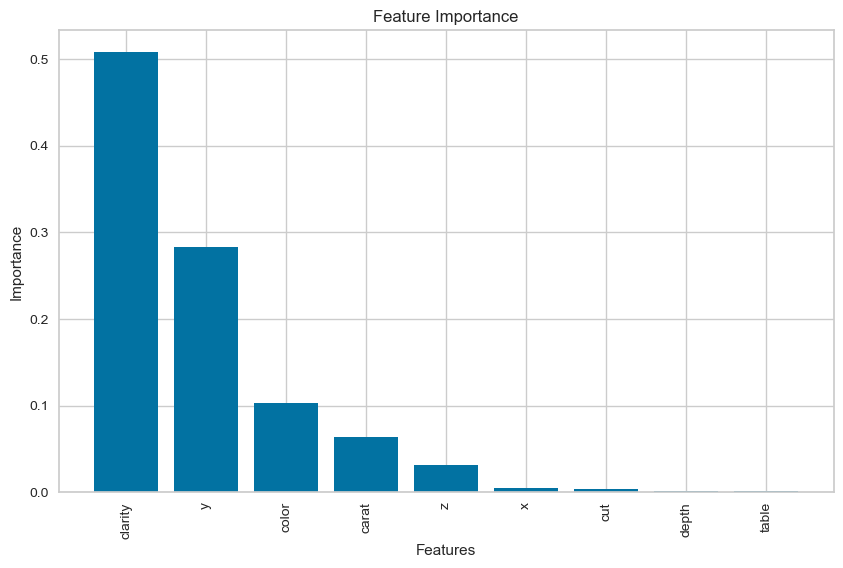

In [94]:
import matplotlib.pyplot as plt

# Fit the pipeline to the training data
pipe_xg_model2.fit(X_train, y_train)

# Access the XGBoost model from the pipeline
xgb_model = pipe_xg_model2.named_steps["xg"]

# Get the feature importance values
feature_importance = xgb_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the features and their importance values in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

## Comparing the models

In [101]:
compare = pd.DataFrame({
    "Model": ['Linear Regression', 'Random Forest', 'XGBoost'],
    "R2 Score": [lr_R2[0], rf_R2[0], xg_R2[0]],
    "MAE Score": [lr_mae[0], rf_mae[0], xg_mae[0]],
    "MSE Score": [lr_mse[0], rf_mse[0], xg_mse[0]],
    'RMSE Score': [lr_rmse, rf_rmse, xg_rmse]
})


compare

,Model,R2 Score,MAE Score,MSE Score,RMSE Score
0,Linear Regression,0.906565,719.132136,1.161465e+06,1077.712967
1,Random Forest,0.976640,296.688996,2.903810e+05,538.870099
2,XGBoost,0.981146,246.138304,2.343632e+05,484.110701


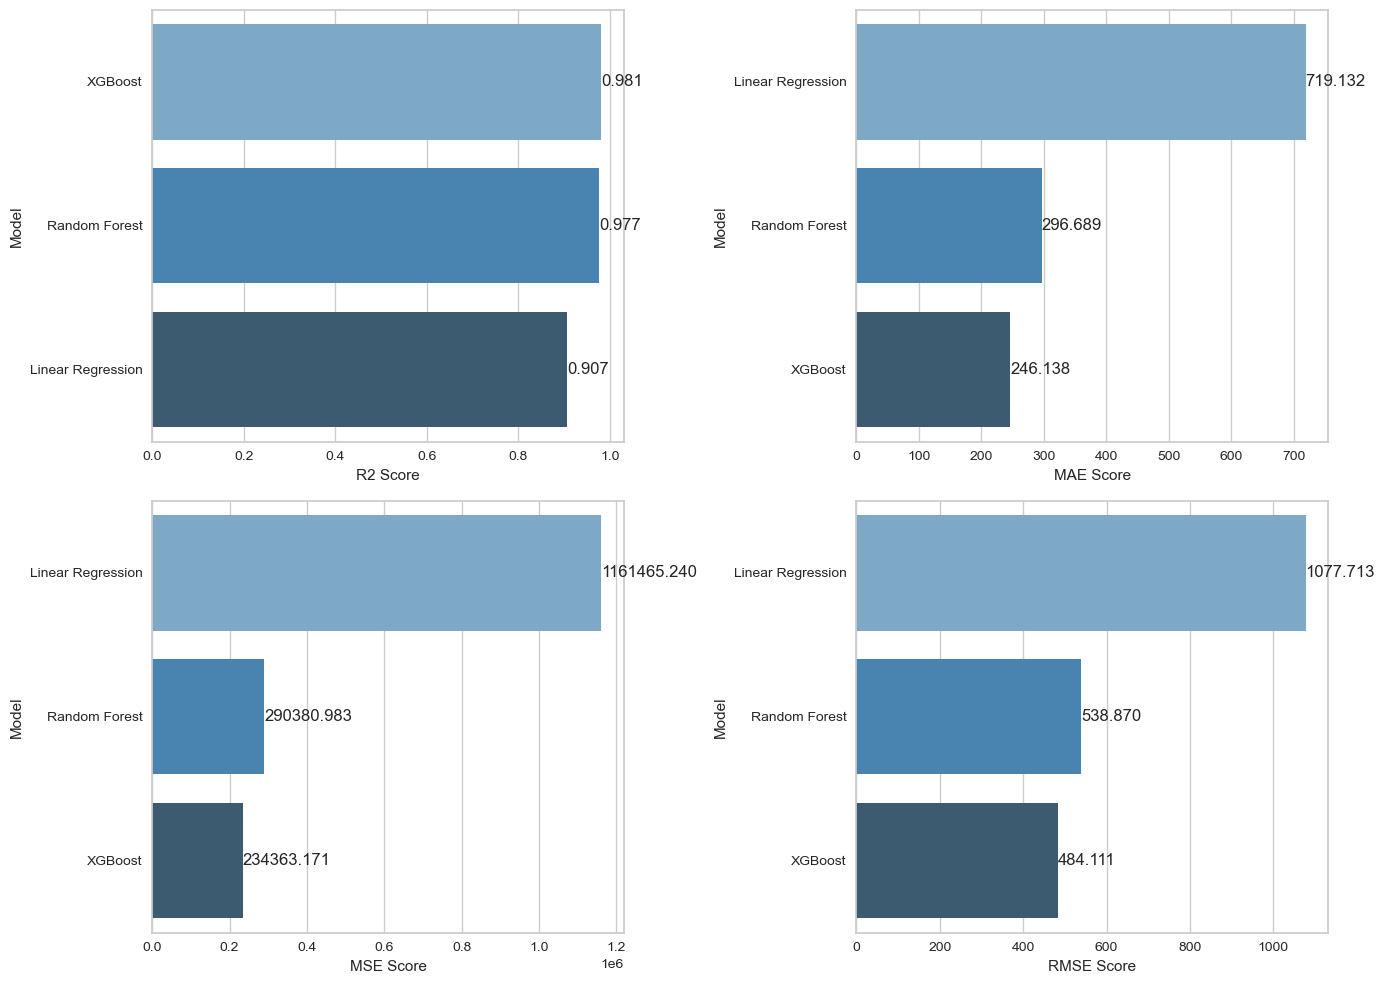

In [104]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment

plt.figure(figsize=(14, 10))

plt.subplot(221)
compare = compare.sort_values(by="R2 Score", ascending=False)
ax = sns.barplot(x="R2 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(222)
compare = compare.sort_values(by="MAE Score", ascending=False)
ax = sns.barplot(x="MAE Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(223)
compare = compare.sort_values(by="MSE Score", ascending=False)
ax = sns.barplot(x="MSE Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(224)
compare = compare.sort_values(by="RMSE Score", ascending=False)
ax = sns.barplot(x="RMSE Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.tight_layout()
plt.show()

#We can notice that xg model is the best model as it gave the lest rmse score compared with the other models 

**Now, I am going to create the final model with the best score of rmse**

## Final Model 

In [105]:
operations = [
    ("Ordinalencoder", column_trans),
    ('scaler', scaler),
    ("xg", xgb.XGBRegressor(max_depth=4, min_child_weight=9, n_estimators=300, random_state=101))
]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

# train_val(pipe_rf_model2, X_train, y_train, X_test, y_test)

Pipeline(steps=[('Ordinalencoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['Ideal',
                                                                              'Premium',
                                                                              'Very '
                                                                              'Good',
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['color', 'cut', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None, min_child_weight=9,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=101, ...))])

## Saving the Model 

In [106]:
import pickle
pickle.dump(final_model, open('final_xg', 'wb'))

In [107]:
import joblib

joblib.dump(final_model, 'final_xg.joblib')

['final_xg.joblib']

In [108]:
new_model = pickle.load(open('final_xg', 'rb'))

### Prediction Part

In [110]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...
40918,0.52,Ideal,E,VS2,61.5,56.0,5.16,5.18,3.18
40919,0.72,Very Good,D,VS2,62.1,59.0,5.70,5.73,3.55
40920,0.44,Premium,I,VVS1,61.5,58.0,4.95,4.87,3.02
40921,0.31,Premium,E,VS1,60.2,58.0,4.38,4.43,2.65


In [115]:
my_dict = {
    'carat': 1.00,
    'cut': 'Premium',
    'color': 'G',
    'clarity': 'SI2', 
    'depth': 60.9,
    'table': 50,
    'x': 4,
    'y': 8,
    'z': 7
}

In [116]:
data = pd.DataFrame.from_dict([my_dict])
data

,carat,cut,color,clarity,depth,table,x,y,z
0,1.0,Premium,G,SI2,60.9,50,4,8,7


In [117]:
prediction = new_model.predict(data)
print(prediction)

[6872.739]


In [118]:
print("The estimated price is {}. ".format(int(prediction[0])))

The estimated price is 6872. 


## Prediction on the testing data

In [119]:
ID= test_df['Id']
ID

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [121]:
price=final_model.predict(test_df.drop('Id',axis=1))
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)
sub.to_csv('xg_final_model.csv',index=False)

## Thank You